In [1]:
import volume_finder
import MDAnalysis as mda
import trimesh
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

/Users/danielevans/Desktop/work/lau/mda/mda_3p9/.venv/lib/python3.9/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


In [2]:
u=mda.Universe("../../../../povme/test/test_omt.pdb")
prot_atoms = u.select_atoms("protein")

/Users/danielevans/Desktop/work/lau/mda/mda_3p9/.venv/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


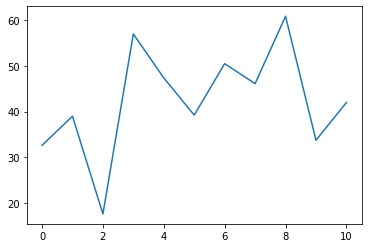

In [3]:
volumes = []
pockets = []
prots = []

grid_size = 0.5
roi_rad = 5 - (3/5) * grid_size
roi_sphere = trimesh.primitives.Sphere(center=[ 5.1972256, -3.2381766,  5.0007186], radius=roi_rad)
roi_voxel = roi_sphere.voxelized(grid_size)
roi_voxel.fill()
for frame in u.trajectory[0:11]:

    s = volume_finder.ProteinSurface(prot_atoms, solvent_rad=1.09, grid_size=grid_size)
    
    su = volume_finder.voxel_subtract(roi_voxel, s.surf)
    volumes.append(su.volume)
    pockets.append(su)
    prots.append(s)

plt.plot(volumes)
plt.show()